In [8]:
Sd= pd.read_excel(r'C:\Users\HP\Downloads\segmentation data.xlsx')

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Sd

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [4]:
Sd_income = Sd.sort_values(by='Income',ascending=False)
print('People who earned most:')
Sd_income.head(10)

People who earned most:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
374,100000375,1,1,60,2,309364,2,2
1041,100001042,1,1,61,2,308529,2,2
915,100000916,1,1,32,1,308491,2,1
917,100000918,0,0,68,2,287247,2,2
1029,100001030,0,0,68,2,287106,2,2
1093,100001094,0,0,65,2,285647,2,2
378,100000379,0,0,57,2,281923,2,1
1097,100001098,0,0,57,2,281647,2,1
1033,100001034,0,0,57,2,281084,2,1
1003,100001004,0,1,44,2,280570,2,2


In [6]:
Sd_income = Sd.sort_values(by='Income',ascending=True)
print('People who earned least:')
Sd_income.head(15)

People who earned least:


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
640,100000641,1,1,27,1,35832,0,0
1368,100001369,1,0,34,1,36760,0,0
1578,100001579,1,1,27,1,38247,0,0
1795,100001796,1,1,28,1,38980,0,0
1399,100001400,1,1,27,1,40606,0,0
972,100000973,1,1,29,1,41680,0,0
1958,100001959,1,1,33,1,42516,0,0
364,100000365,0,0,25,0,43684,0,0
1707,100001708,1,1,33,1,43805,0,0
1965,100001966,0,0,24,0,44742,0,0


In [32]:
Sds=Sd_income.head(200)

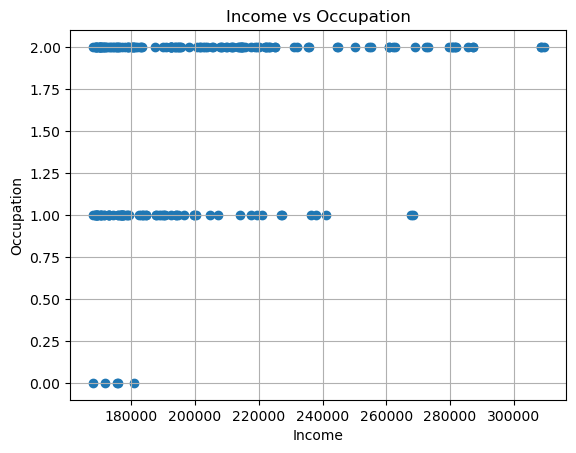

In [33]:
x = Sds['Income']
y = Sds['Occupation']

# Plotting scatter plot
plt.scatter(x, y)
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.title('Income vs Occupation')
plt.grid(True)
plt.show()

In [14]:
#The avearge salary of the customers
Mo = 'Income'

# Calculate the mean
column_mean = Sd[Mo].mean()

print(f"The average salary of the customers: {column_mean}")

The average salary of the customers: 120954.419


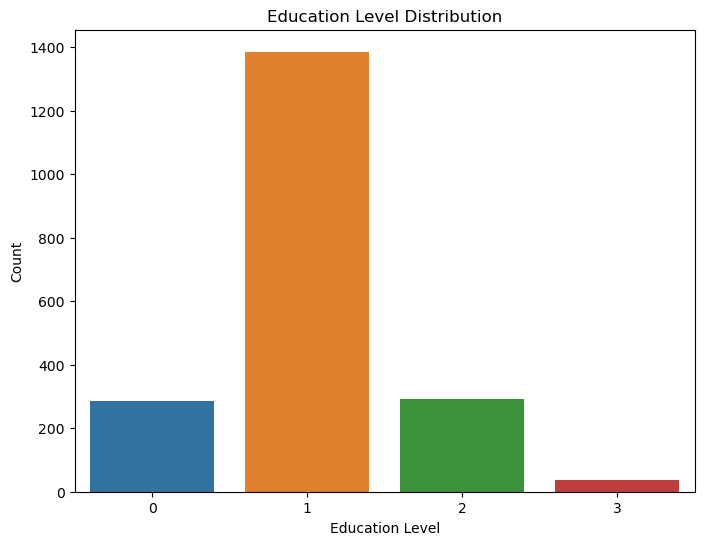

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Sd, x='Education')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.show()

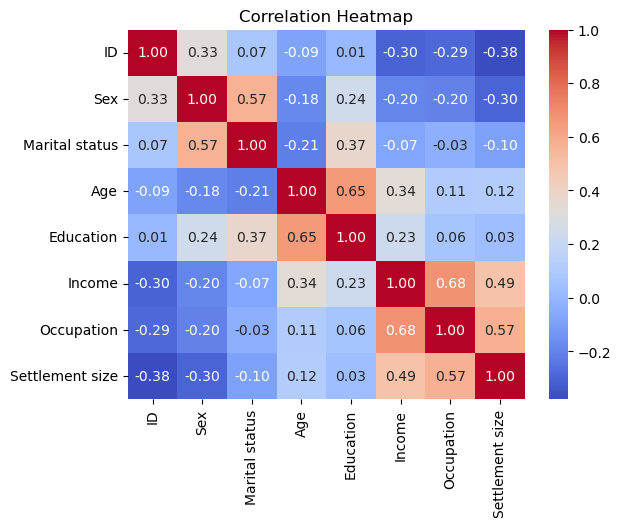

In [15]:
correlation_matrix = Sd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


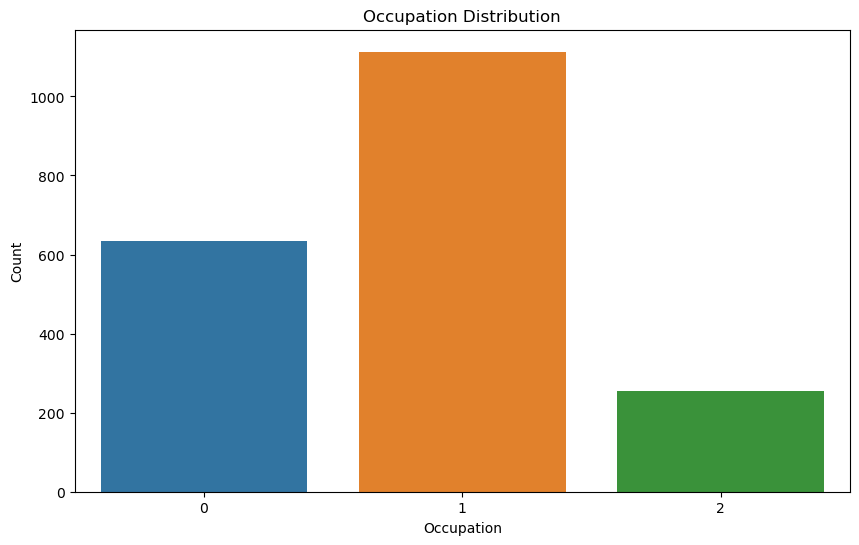

In [13]:
# Distribution of occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=Sd, x='Occupation')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.show()

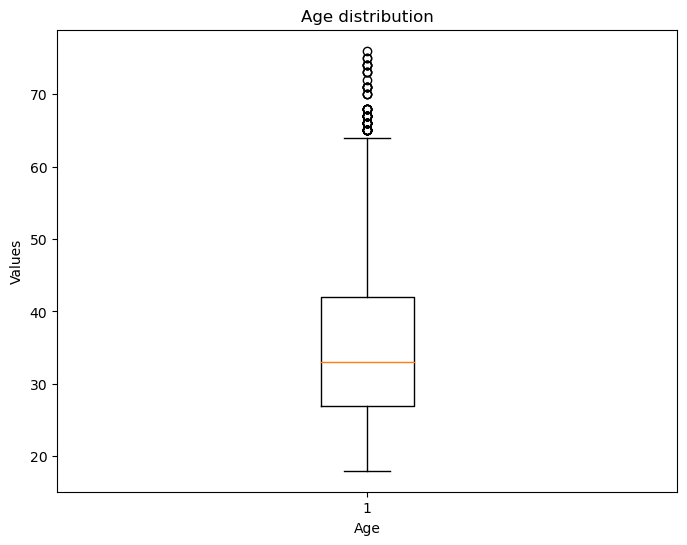

In [10]:
#checking out if we have ouliers in the age of customers
plt.figure(figsize=(8,6))  # Adjust the figure size if needed
plt.boxplot(Sd['Age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

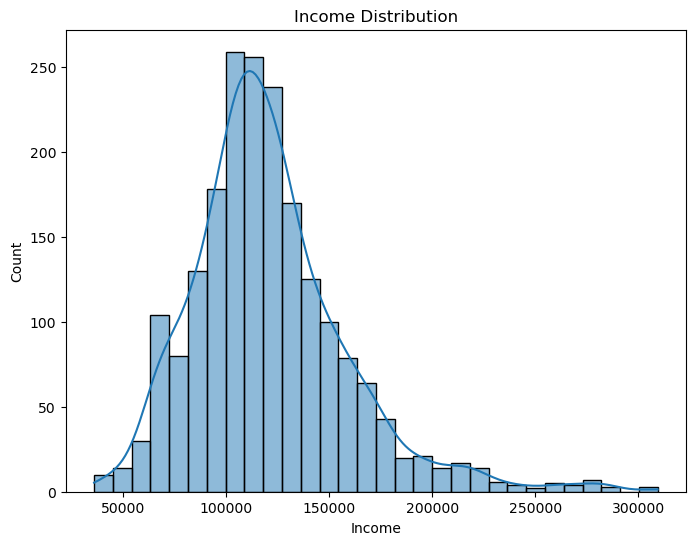

In [11]:
# Income distribution
plt.figure(figsize=(8, 6))
sns.histplot(Sd['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

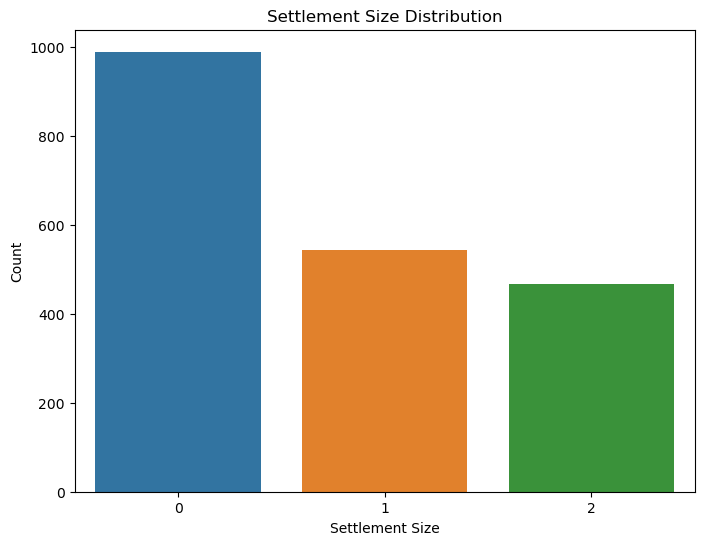

In [18]:
# Settlement size distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=Sd, x='Settlement size')
plt.title('Settlement Size Distribution')
plt.xlabel('Settlement Size')
plt.ylabel('Count')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = Sd[['Age', 'Occupation', 'Education', 'Settlement size']]
y = Sd['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 671082954.4238591


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = Sd[['Age', 'Income', 'Education', 'Settlement size']]
y = Sd['Occupation']  # Assuming occupation is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.735

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       142
           1       0.71      0.82      0.76       204
           2       0.61      0.43      0.50        54

    accuracy                           0.73       400
   macro avg       0.71      0.66      0.68       400
weighted avg       0.74      0.73      0.73       400



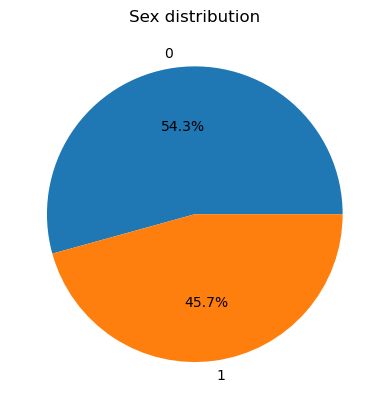

In [26]:
sex_counts = Sd['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex distribution')
plt.show()

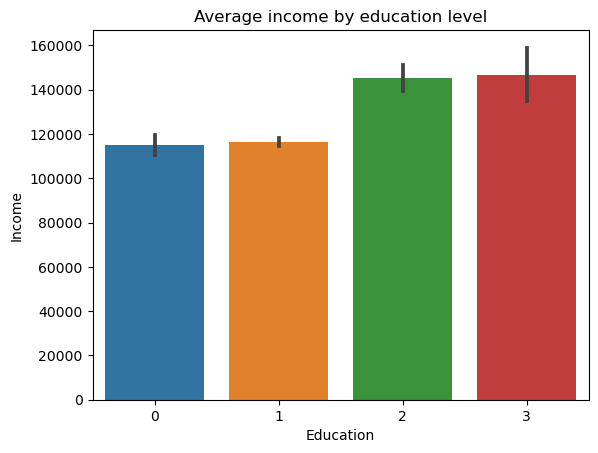

In [26]:
# Bar plot to visualize the average income by education level
sns.barplot(x='Education', y='Income', data=Sd, estimator=np.mean)
plt.title('Average income by education level')
plt.show()


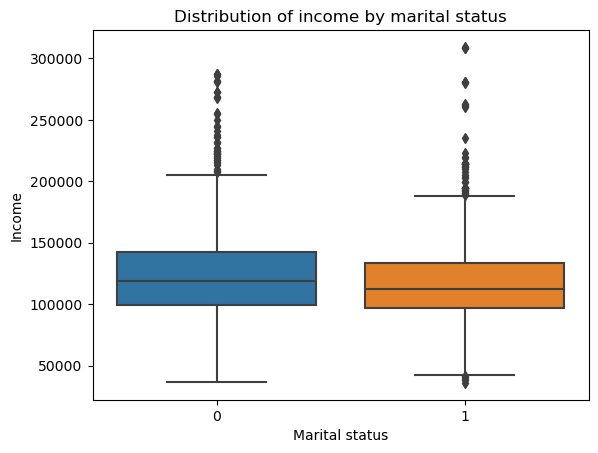

In [29]:
sns.boxplot(x='Marital status', y='Income', data=Sd)
plt.title('Distribution of income by marital status')
plt.show()

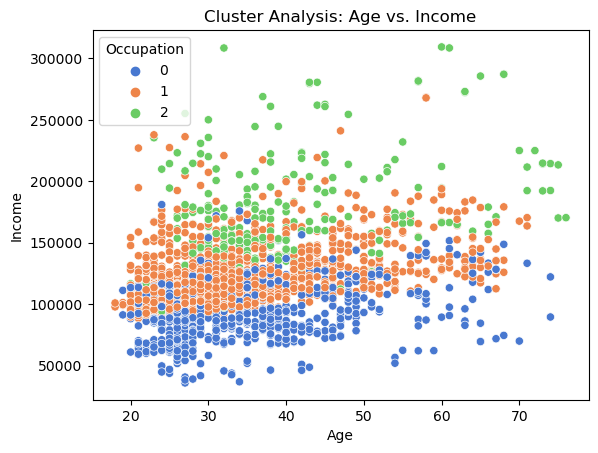

In [12]:
sns.scatterplot(data=Sd, x='Age', y='Income', hue='Occupation', palette='muted')
plt.title('Cluster Analysis: Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
df = pd.get_dummies(Sd, columns=['Marital status', 'Settlement size', 'Occupation', 'Sex', 'Education'])

# Splitting data into features and target variable
X = Sd.drop(['ID', 'Sex'], axis=1)  # Assuming 'ID' is not needed for prediction
y = Sd['Settlement size']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # You can adjust parameters as needed
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[194  27   2]
 [ 42  44   7]
 [ 40  29  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       223
           1       0.44      0.47      0.46        93
           2       0.62      0.18      0.28        84

    accuracy                           0.63       400
   macro avg       0.59      0.51      0.50       400
weighted avg       0.63      0.63      0.60       400

